## Task-03: Decision Tree Classifier on Bank Marketing Dataset

This notebook builds a **Decision Tree Classifier** to predict whether a customer will subscribe to a term deposit based on **demographic and behavioral attributes**. The project uses the **Bank Marketing Dataset** from the UCI Machine Learning Repository. It involves preprocessing, label encoding, model training, and visualization of the decision tree structure to identify key patterns that influence customer conversion.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
df = pd.read_csv("bank-full.csv", sep=';')  # Use ';' as it's not comma-separated
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.shape                 # Number of rows and columns
df.info()                # Data types and null values
df.describe()            # Statistical summary
df.isnull().sum()        # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Label encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [17]:
X = df.drop('y', axis=1)
y = df['y']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8740462235983634
Confusion Matrix:
 [[7378  574]
 [ 565  526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



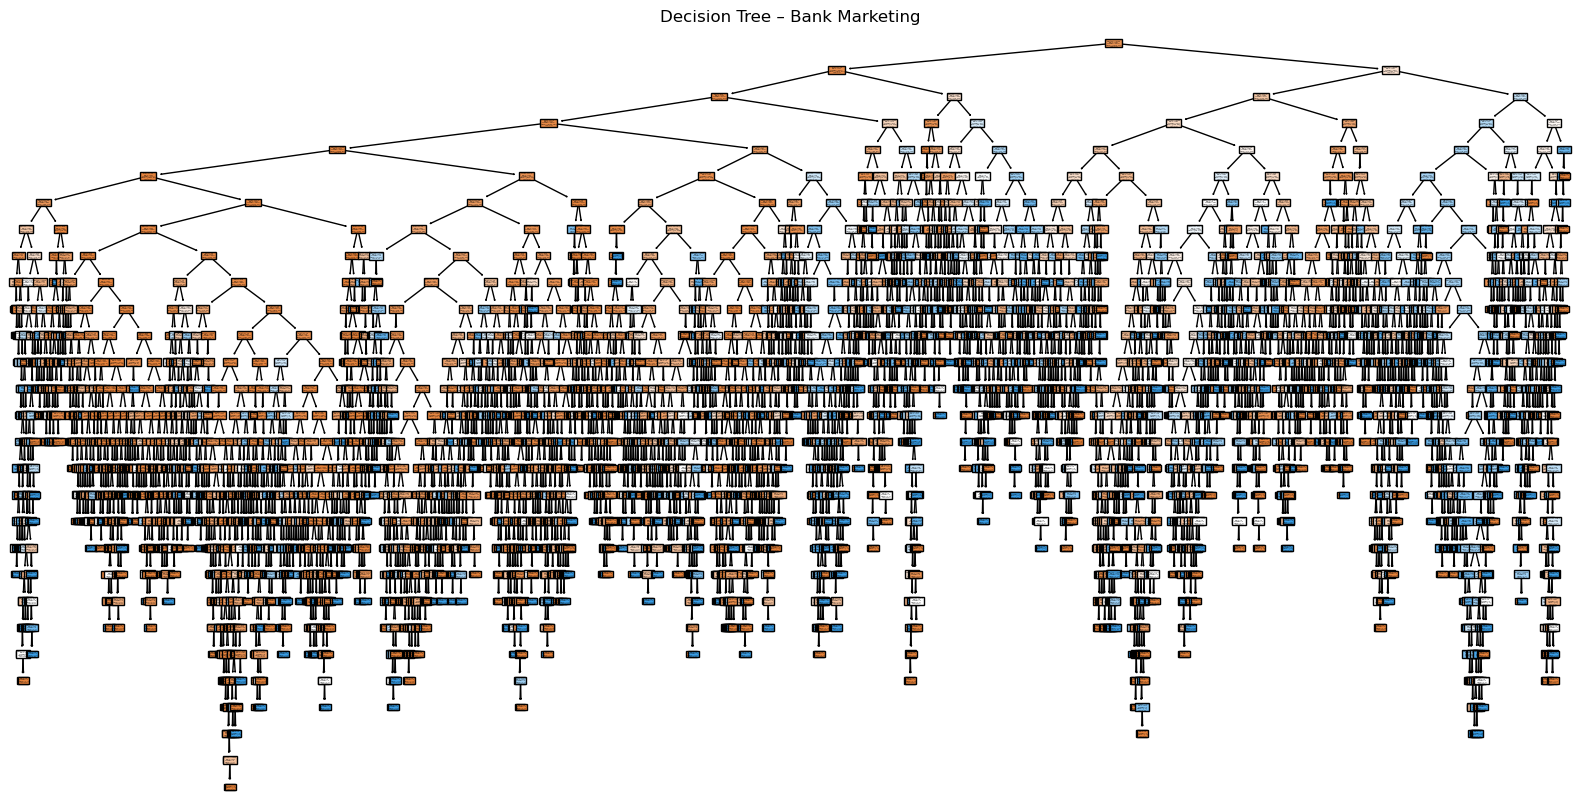

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=["No", "Yes"])
plt.title("Decision Tree – Bank Marketing")
plt.show()


### Summary

- Cleaned the dataset and encoded categorical variables for model compatibility.  
- Built a decision tree classifier using **scikit-learn** to predict subscription outcomes.  
- Visualized the decision tree to interpret **feature importance and decision rules**.  
- Evaluated the model using **accuracy**, **confusion matrix**, and **classification report**.  
- Identified patterns such as higher conversion rates among certain job types and contact methods.